In [8]:
import six

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_venn
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style='ticks', context='paper')

%matplotlib inline
import flotilla

%load_ext autoreload
%autoreload 2

folder = 'figures'

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'
study = flotilla.embark('singlecell_pnm_figure1_post_kmeans_outliers', flotilla_dir=flotilla_dir)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2016-12-29 12:54:48	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure1_post_kmeans_outliers/datapackage.json
2016-12-29 12:54:48	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.
2016-12-29 12:55:02 	Initializing Study
2016-12-29 12:55:02 	Initializing Predictor configuration manager for Study
2016-12-29 12:55:02	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-12-29 12:55:02	Added ExtraTreesClassifier to default predictors
2016-12-29 12:55:02	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-12-29 12:55:02	Added ExtraTreesRegressor to default predictors
2016-12-29 12:55:02	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradie

Error loading species hg19 data: HTTP Error 404: Not Found

In [9]:
study.splicing.minimum_samples

10

In [10]:
figure_folder = 'figures/005_mapping_stats'
! mkdir -p $figure_folder

In [11]:
mkdir $folder

mkdir: cannot create directory `figures': File exists


### Mapped reads

In [12]:
study.mapping_stats.data.head()

,Started job on,Started mapping on,Finished on,"Mapping speed, Million of reads per hour",Number of input reads,Average input read length,UNIQUE READS,Uniquely mapped reads number,Uniquely mapped reads %,Average mapped length,...,% of reads mapped to too many loci,UNMAPPED READS,% of reads unmapped: too many mismatches,% of reads unmapped: too short,% of reads unmapped: other,% splices: Annotated (sjdb),% splices: GT/AG,% splices: GC/AG,% splices: AT/AC,% splices: Non-canonical
CVN_01,Feb 21 15:54:22,Feb 21 15:55:44,Feb 21 15:57:19,459.82,12134131.0,99.0,NaN,11128688.0,91.71,98.27,...,0.03,NaN,0.0,3.10,0.02,98.841858,99.126387,0.652647,0.134704,0.086261
CVN_02,Feb 21 15:55:43,Feb 21 15:57:11,Feb 21 15:58:51,480.66,13351539.0,99.0,NaN,12219037.0,91.52,98.13,...,0.04,NaN,0.0,3.96,0.02,98.614629,99.020137,0.801086,0.097722,0.081054
CVN_03,Feb 21 16:51:58,Feb 21 16:53:51,Feb 21 16:55:31,484.15,13448587.0,99.0,NaN,12210025.0,90.79,98.07,...,0.03,NaN,0.0,4.99,0.02,98.596403,99.028733,0.796140,0.101854,0.073272
CVN_04,Feb 21 16:45:53,Feb 21 16:47:23,Feb 21 16:48:59,474.71,12658833.0,99.0,NaN,11805790.0,93.26,98.33,...,0.04,NaN,0.0,2.89,0.02,98.831275,99.120483,0.711286,0.084708,0.083523
CVN_05,Feb 21 16:50:26,Feb 21 16:52:19,Feb 21 16:54:01,486.68,13789345.0,99.0,NaN,12894337.0,93.51,98.44,...,0.03,NaN,0.0,2.49,0.02,98.605923,99.083942,0.761804,0.089186,0.065069


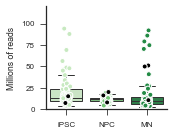

In [13]:
# sns.set(context='paper', style='ticks')
reads_col = 'Uniquely mapped reads number'
mapped_reads = study.mapping_stats.data[reads_col]/1e6


mapped_reads = mapped_reads.to_frame().join(study.metadata.data[['pooled', 'phenotype']])
mapped_reads = mapped_reads.rename(columns={0: 'Millions of reads'})

mapped_reads_pooled = mapped_reads.ix[mapped_reads.pooled]
mapped_reads_single = mapped_reads.ix[~mapped_reads.pooled]

fig, ax = plt.subplots(figsize=(2.5, 2))
sns.boxplot(x='phenotype', y=reads_col, order=study.phenotype_order, linewidth=1, 
               data=mapped_reads_single, palette=study.phenotype_color_ordered, fliersize=0)
sns.stripplot(x='phenotype', y=reads_col, order=study.phenotype_order, linewidth=1,edgecolor='white', #size=2,
               data=mapped_reads_single, palette=study.phenotype_color_ordered, jitter=True)
sns.stripplot(x='phenotype', y=reads_col, order=study.phenotype_order, linewidth=1,edgecolor='white',
              data=mapped_reads_pooled, color='k', size=5, jitter=True)
sns.despine()
ax.set_xlabel('')

ax.set_ylabel('Millions of reads')

ymin, ymax = ax.get_ylim()
ax.set_ylim(0, ymax)

# Reduce number of ticks
yloc = plt.MaxNLocator(5)
ax.yaxis.set_major_locator(yloc)

sns.despine()
fig.tight_layout()
fig.savefig('{}/mapped_reads.pdf'.format(figure_folder))